# 00. Contents

### 01. Importing libraries

### 02. Importing data

### 03. Prepping data for analysis

### 04. Elbow technique

### 05. k-means clustering

# 01. Importing libraries

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

# 02. Importing data

In [61]:
# Creating a path

path = r'/Users/agne/Documents/Studies/Data Analysis/Study Materials/Advanced Analytics'

In [62]:
df_income = pd.read_csv(os.path.join(path, '6.1 Sourcing the Data', 'cleaned_income.csv'), index_col=False)

# 03. Prepping data for the analysis

In [64]:
# Dropping the Unnamed column

df_income.drop(columns = ['Unnamed: 0'], inplace=True)

In [131]:
numbers_only = df_income[['Median Household Income', 'Total Population']]

In [132]:
numbers_only.dtypes

Median Household Income    int64
Total Population           int64
dtype: object

# 04. Elbow technique

In [134]:
# Setting the range

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [135]:
# Checking the score for the clusters
score = [kmeans[i].fit(numbers_only).score(numbers_only) for i in range(len(kmeans))]

score

[-350534553969300.4,
 -167599061381904.4,
 -86032579365847.56,
 -49832188188458.5,
 -30146803187253.574,
 -18192392522444.85,
 -12443378923806.145,
 -8641338455936.379,
 -7295259611772.855]

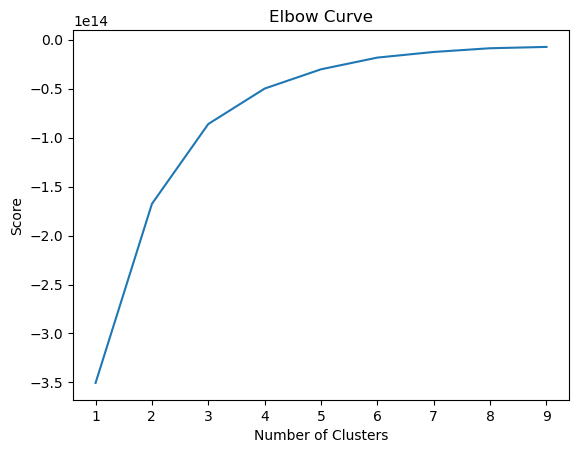

In [136]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Looks like 4 is the optimal choice for the clusters because after it, the increase is minimal.

# 05. k-means clustering

In [139]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [140]:
# Fitting the k-means object to the data.

kmeans.fit(numbers_only)

KMeans(n_clusters=4)

In [141]:
# Visualizing the clusters
numbers_only['clusters'] = kmeans.fit_predict(numbers_only)

/var/folders/53/fhgd2kgx51j3l2vlj5dchl_w0000gq/T/ipykernel_33109/3200011041.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numbers_only['clusters'] = kmeans.fit_predict(numbers_only)


In [142]:
# Checking the clusters

numbers_only.head()

,Median Household Income,Total Population,clusters
0,69841,59285,0
1,75019,239945,0
2,44290,24757,0
3,51215,22152,0
4,61096,59292,0


In [143]:
# Checking the cluster distribution

numbers_only['clusters'].value_counts()

clusters
0    2962
2     163
1      18
3       1
Name: count, dtype: int64

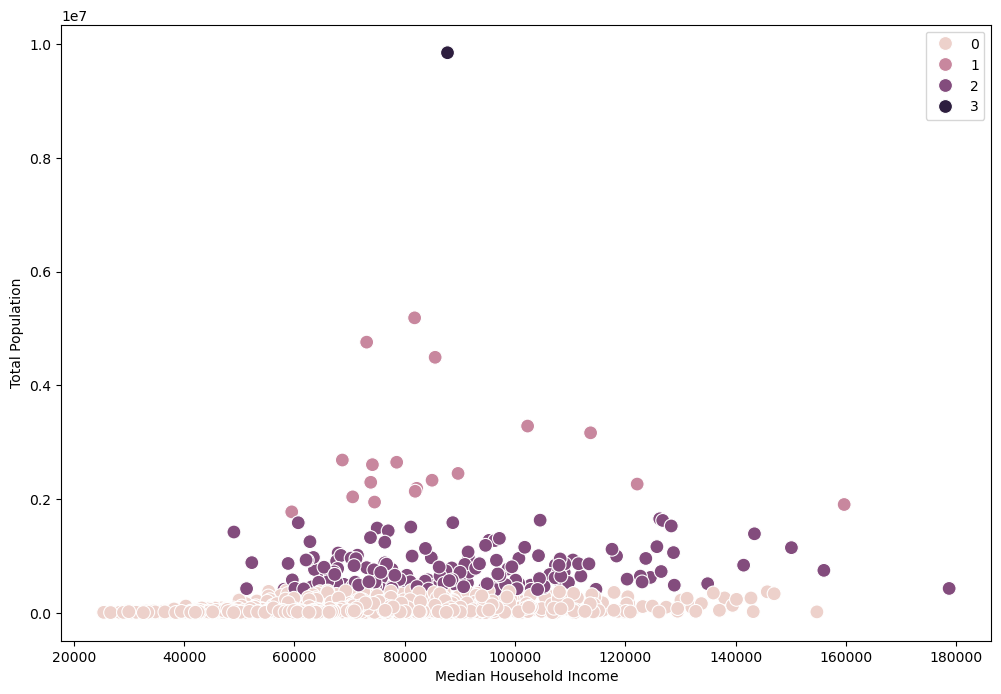

In [144]:
# Plotting the clusters for the "Median Household Income" and "Total Poppulation" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=numbers_only['Median Household Income'], y=numbers_only['Total Population'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Median Household Income')
plt.ylabel('Total Population')
plt.show()

The one value (in cluster 3) is very extreme, so it makes sense that it's separate from the rest. I wonder if eliminating it would be a good idea, yet at the same time I want to avoid potential biases that it would cause.

The places where the population is quite high, the median income is middle to high (cluster 2). This makes sense as one would assume that working in the city would probably result in higher salaries.

In places where the population is low, there are more people with lower income (cluster 1). However, the income doesn't seem to strictly depend on that, as the range of the cluster expands to the higher end of the income bracket, too.

In [146]:
# Naming the clusters so they are easier to identify

numbers_only.loc[numbers_only['clusters'] == 3, 'cluster'] = 'dark purple'
numbers_only.loc[numbers_only['clusters'] == 2, 'cluster'] = 'purple'
numbers_only.loc[numbers_only['clusters'] == 1, 'cluster'] = 'pink'
numbers_only.loc[numbers_only['clusters'] == 0, 'cluster'] = 'blush'

/var/folders/53/fhgd2kgx51j3l2vlj5dchl_w0000gq/T/ipykernel_33109/2855156630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numbers_only.loc[numbers_only['clusters'] == 3, 'cluster'] = 'dark purple'


In [147]:
numbers_only.groupby('cluster').agg({'Median Household Income':['mean', 'median'], 
                          'Total Population':['mean', 'median']})

Median Household Income          Total Population           
                               mean   median             mean     median
cluster                                                                 
blush                  64613.428764  62808.5     5.045898e+04    23420.5
dark purple            87760.000000  87760.0     9.848406e+06  9848406.0
pink                   87600.666667  81851.0     2.785514e+06  2390016.5
purple                 90074.901840  87470.0     7.542355e+05   669744.0

The dark purple one is tough to interpret because it represents only one value. So, this suggests that maybe it makes sense to eliminate it from further analysis as an outlier.

The blush cluster seems to be doing the best when it comes to aggregates. median houehol income. It also places third for the population size. Thsi seems to be ideal, as the counties are not overpopulated but the income is still high. This could answer quention on which counties are best to live in to get a balance of community and good income.

In [149]:
# Exporting the final data set file to pickle

numbers_only.to_csv(os.path.join(path, '6.7 Final project', 'clusterplot.csv'))

In [165]:
# Combine categorical columns with clustering results
final_df = df_income.copy()
final_df['cluster'] = numbers_only['cluster']  # Add cluster column

In [167]:
final_df.head()

,County,State,FIPS,State FIPS Code,County FIPS Code,Total Population,Median Household Income,Urban-Rural,cluster
0,Autauga County,Alabama,1001,1,1,59285,69841,Urban,blush
1,Baldwin County,Alabama,1003,1,3,239945,75019,Urban,blush
2,Barbour County,Alabama,1005,1,5,24757,44290,Rural,blush
3,Bibb County,Alabama,1007,1,7,22152,51215,Rural,blush
4,Blount County,Alabama,1009,1,9,59292,61096,Urban,blush


In [169]:
# Save the result
final_df.to_csv(os.path.join(path, '6.7 Final project', 'clusterplot.csv'), index=False)